# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [152]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/Advertising.csv',index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [153]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [155]:
X = df.drop(columns='sales')
y = df['sales'].values
n = len(y)
par = np.zeros((4,1))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [156]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [157]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [158]:
num_iters = 1000#количество итераций
m = len(X) # количество строк в матрице X
n = len(X[0])# количество столбцов в матрице X
w = np.zeros((n,1))#вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2) /(len(y))

In [159]:
w

array([[ 41.56217205],
       [110.13144155],
       [ 73.52860638],
       [ -0.55006384]])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [160]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [161]:
X = df.drop(columns='sales')

In [162]:
X['TV'] = X['TV'].apply(lambda x: (x - X['TV'].mean()) / X['TV'].std())
X['radio'] = X['radio'].apply(lambda x: (x - X['radio'].mean()) / X['radio'].std())
X['newspaper'] = X['newspaper'].apply(lambda x: (x - X['newspaper'].mean()) / X['newspaper'].std())

In [163]:
X=X.values

**Добавим единичный столбец**

In [164]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [165]:
def mse_error(y, y_pred):
    return float(sum((y-y_pred)**2)/(len(y)))

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [166]:
y_pred= np.full(len(y), y.mean())
y_pred = y_pred.reshape(-1, 1)
mse_error(y,y_pred)

27.085743749999985

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [167]:
def lin_pred(x,array_weight):
    return np.dot(x,array_weight)
y_pred2 = np.array(lin_pred(X, w))

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [168]:
def stochastic_gradient_step(X, y, w, train_ind, eta):
    X=np.array(X)
    y=np.array(y)
    w=np.array(w)
    l = len(y)
    
    grad0 = (np.dot(X[train_ind],w)-y[train_ind])*2*X[train_ind,0]
    grad1 = (np.dot(X[train_ind],w)-y[train_ind])*2*X[train_ind,1]
    grad2 = (np.dot(X[train_ind],w)-y[train_ind])*2*X[train_ind,2]
    grad3 = (np.dot(X[train_ind],w)-y[train_ind])*2*X[train_ind,3]
    
    return (w - eta / l * np.array([grad0, grad1, grad2, grad3]))

In [170]:
stochastic_gradient_step(X, y, w, 0, eta=0.01)

array([[ 41.54247012],
       [110.11238142],
       [ 73.5093169 ],
       [ -0.58502477]])

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [173]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=1e5,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = np.array(w_init).reshape(4,1)
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        iter_num+=1
        fr_cst = lin_pred(X, w)
        weight_dist = np.linalg.norm(new_w-w)
        errors.append(mse_error(y[:,0], fr_cst.flatten()))
        w = new_w   
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [180]:
stochastic_gradient_descent(X=X,y=y, w_init=(np.zeros(4)), max_iter=1e5)

(array([[1.39903864e+01],
        [3.89172998e+00],
        [2.79230916e+00],
        [6.17758541e-03]]),
 [223.71625000000003,
  223.66543574426964,
  223.63641984449532,
  223.5550606299942,
  223.48101736067972,
  223.4727593376698,
  223.44670379062998,
  223.39195410652647,
  223.32175411026014,
  223.27109425007336,
  223.2588856769861,
  223.20298662221725,
  223.14683456415275,
  223.1186665732886,
  223.0568450867557,
  223.015681635486,
  222.99076199111497,
  222.98781814155814,
  222.96937262693035,
  222.87245377627409,
  222.8451104018074,
  222.789144552191,
  222.77025301924294,
  222.7214262037608,
  222.70541278802364,
  222.69200131873222,
  222.63503973539954,
  222.5651070496456,
  222.52444125903523,
  222.49309039140192,
  222.45766701995854,
  222.42176794682658,
  222.3707494371064,
  222.26316284436353,
  222.21349613815752,
  222.1566530009572,
  222.08310861162815,
  222.07602609762853,
  222.06895014019221,
  222.04010948729658,
  222.03304345666,
  222.004

**Постройте график зависимости ошибки от номера итерации**

In [175]:

stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X=X,y=y, w_init=(np.ones(4)*0), max_iter=1e5)

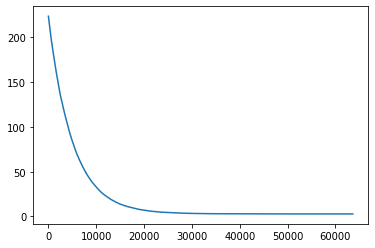

In [178]:
import matplotlib.pyplot as plt
plt.plot(stoch_errors_by_iter)

**Выведите вектор весов, к которому сошелся метод.**

In [182]:
stoch_grad_desc_weights

array([[1.39903864e+01],
       [3.89172998e+00],
       [2.79230916e+00],
       [6.17758541e-03]])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [183]:
stoch_errors_by_iter[-1]

2.7871848010184426